In [1]:
import os
os.chdir('C:\\Users\\Venki\\Desktop\\data science\\All data')

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import DataFrame
from pandas import Grouper
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

# Cocacola prices

In [99]:
coco=pd.read_csv('CocaCola_Sales_Rawdata1.csv')

In [100]:
coco

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [101]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [102]:
coco.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


# EDA

In [103]:
c = coco.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')

In [104]:
c1=pd.to_datetime(c).dt.strftime('%b-%Y')

In [105]:
c1

0     Jan-1986
1     Apr-1986
2     Jul-1986
3     Oct-1986
4     Jan-1987
5     Apr-1987
6     Jul-1987
7     Oct-1987
8     Jan-1988
9     Apr-1988
10    Jul-1988
11    Oct-1988
12    Jan-1989
13    Apr-1989
14    Jul-1989
15    Oct-1989
16    Jan-1990
17    Apr-1990
18    Jul-1990
19    Oct-1990
20    Jan-1991
21    Apr-1991
22    Jul-1991
23    Oct-1991
24    Jan-1992
25    Apr-1992
26    Jul-1992
27    Oct-1992
28    Jan-1993
29    Apr-1993
30    Jul-1993
31    Oct-1993
32    Jan-1994
33    Apr-1994
34    Jul-1994
35    Oct-1994
36    Jan-1995
37    Apr-1995
38    Jul-1995
39    Oct-1995
40    Jan-1996
41    Apr-1996
Name: Quarter, dtype: object

In [106]:
coco['date']=c1

In [107]:
coco.head()

,Quarter,Sales,date
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [108]:
coco1=coco.drop(['Quarter'],axis=1)

In [109]:
coco1

,Sales,date
0,1734.827000,Jan-1986
1,2244.960999,Apr-1986
2,2533.804993,Jul-1986
3,2154.962997,Oct-1986
4,1547.818996,Jan-1987
5,2104.411995,Apr-1987
6,2014.362999,Jul-1987
7,1991.746998,Oct-1987
8,1869.049999,Jan-1988
9,2313.631996,Apr-1988


In [110]:
coco1['date']=pd.to_datetime(coco1['date'])

In [111]:
coco1.set_index('date',inplace=True)

In [112]:
coco1

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


# Visualisation

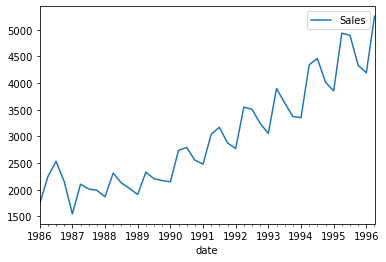

In [41]:
coco1.plot()
pyplot.show()

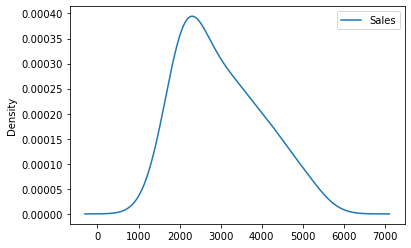

In [42]:
coco1.plot(kind='kde')
pyplot.show()

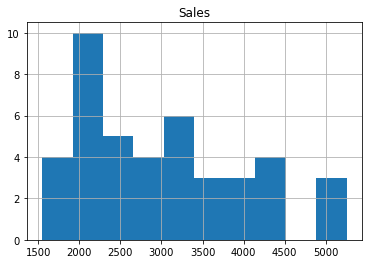

In [43]:
coco1.hist()
pyplot.show()

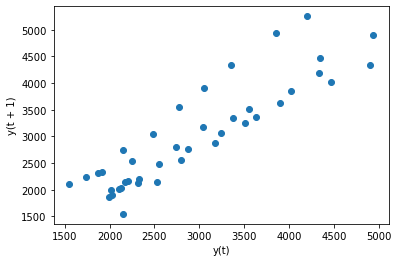

In [44]:
lag_plot(coco1)
pyplot.show()

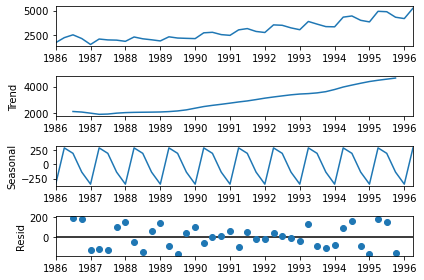

In [45]:
decomposition = sm.tsa.seasonal_decompose(coco1,model='additive')
fig = decomposition.plot()
plt.show()

In [46]:
coco1['Sales']=np.sqrt(coco1['Sales'])

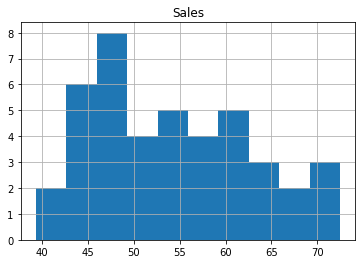

In [47]:
coco1.hist()
pyplot.show()

In [51]:
coco1.size

42

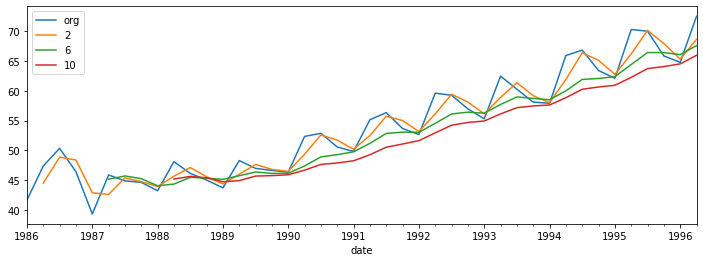

In [52]:
plt.figure(figsize=(12,4))
coco1.Sales.plot(label="org")
for i in range(2,12,4):
    coco1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [53]:
coco1

,Sales
date,
1986-01-01,41.651254
1986-04-01,47.381019
1986-07-01,50.336915
1986-10-01,46.421579
1987-01-01,39.342331
1987-04-01,45.873871
1987-07-01,44.881655
1987-10-01,44.628993
1988-01-01,43.232511


# Model Building

In [54]:
train=coco1.head(34)
test=coco1.tail(8)

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [72]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [92]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

2.5803460167270185

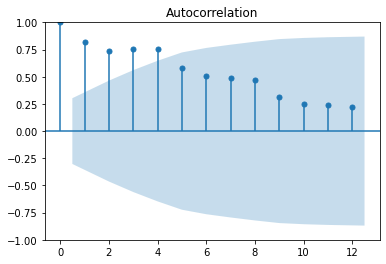

In [55]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coco1.Sales,lags=12)
plt.show()

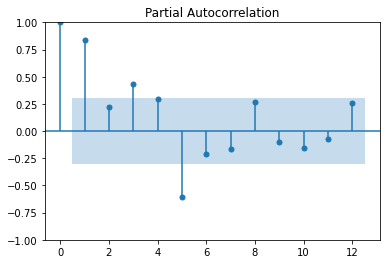

In [56]:
tsa_plots.plot_pacf(coco1.Sales,lags=12)
plt.show()

# ARIMA

In [57]:
import itertools

In [58]:
p = range(0, 6)
d = range(0, 6)
q = range(0, 3)
pdq_combination=list(itertools.product(p,d,q))

In [59]:
len(pdq_combination)
order=[]
mse=[]

In [90]:
for pdq in pdq_combination:
        model=sm.tsa.arima.ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(coco1)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        mse.append(error)  
        print('Best ARIMA%s RMSE=%.2f' % (pdq,error))

Best ARIMA(0, 0, 0) RMSE=16.31
Best ARIMA(0, 0, 1) RMSE=15.52
Best ARIMA(0, 0, 2) RMSE=14.56
Best ARIMA(0, 1, 0) RMSE=3.57
Best ARIMA(0, 1, 1) RMSE=6.17
Best ARIMA(0, 1, 2) RMSE=5.88
Best ARIMA(0, 2, 0) RMSE=38.87
Best ARIMA(0, 2, 1) RMSE=3.78
Best ARIMA(0, 2, 2) RMSE=5.19
Best ARIMA(0, 3, 0) RMSE=193.35
Best ARIMA(0, 3, 1) RMSE=40.18
Best ARIMA(0, 3, 2) RMSE=6.81
Best ARIMA(0, 4, 0) RMSE=546.72
Best ARIMA(0, 4, 1) RMSE=213.31
Best ARIMA(0, 4, 2) RMSE=84.25
Best ARIMA(0, 5, 0) RMSE=1172.11
Best ARIMA(0, 5, 1) RMSE=596.75
Best ARIMA(0, 5, 2) RMSE=288.62
Best ARIMA(1, 0, 0) RMSE=8.48
Best ARIMA(1, 0, 1) RMSE=7.14
Best ARIMA(1, 0, 2) RMSE=6.97
Best ARIMA(1, 1, 0) RMSE=4.10
Best ARIMA(1, 1, 1) RMSE=6.05
Best ARIMA(1, 1, 2) RMSE=5.93
Best ARIMA(1, 2, 0) RMSE=27.57
Best ARIMA(1, 2, 1) RMSE=3.18
Best ARIMA(1, 2, 2) RMSE=3.23
Best ARIMA(1, 3, 0) RMSE=147.50
Best ARIMA(1, 3, 1) RMSE=28.68
Best ARIMA(1, 3, 2) RMSE=32.46
Best ARIMA(1, 4, 0) RMSE=432.26
Best ARIMA(1, 4, 1) RMSE=169.74
Best ARIMA(1

(5,3,2) is the best value

In [79]:
model=sm.tsa.arima.ARIMA(train,order=(5,3,2)).fit()

In [80]:
len(train),(len(coco1)-1)

(34, 41)

In [81]:
pred = model.predict(start=len(train),end=(len(coco1)-1))

In [82]:
pred

1994-07-01    63.127219
1994-10-01    61.464869
1995-01-01    62.307720
1995-04-01    69.783548
1995-07-01    66.648422
1995-10-01    65.926474
1996-01-01    67.501980
1996-04-01    74.346523
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [83]:
err = np.sqrt(mean_squared_error(test,pred))
err

2.2185044218919066

<AxesSubplot:xlabel='date'>

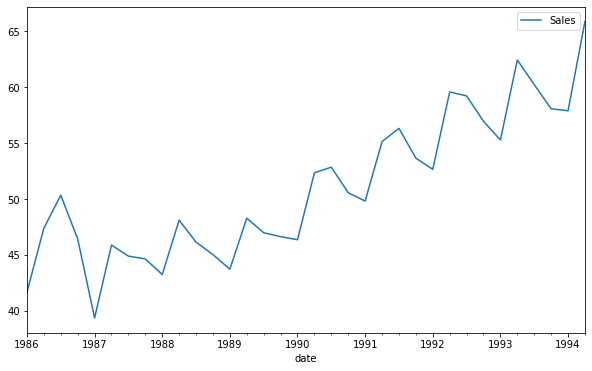

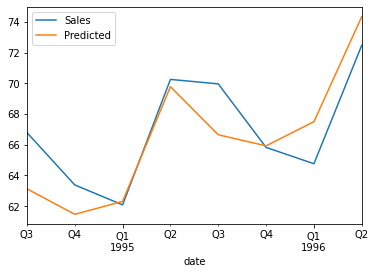

In [84]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='Predicted')

# Final Model

In [113]:
model=sm.tsa.arima.ARIMA(coco1,order=(5,3,2)).fit()

In [119]:
model.forecast(steps=10)

1996-07-01    5227.478717
1996-10-01    4716.729681
1997-01-01    4636.763199
1997-04-01    5662.489442
1997-07-01    5594.489673
1997-10-01    5092.891503
1998-01-01    5050.572156
1998-04-01    6038.470226
1998-07-01    5932.136487
1998-10-01    5443.413825
Freq: QS-OCT, Name: predicted_mean, dtype: float64

The RMSE value is 2.2185044218919066 and we have used ARIMA model.

# Airlines

In [150]:
air=pd.read_csv('Airlines+Data1.csv')

In [151]:
air

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [152]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [153]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# EDA

In [154]:
air['Month']=pd.to_datetime(air['Month'],format='%b-%y')

In [155]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [156]:
air.set_index('Month',inplace=True)

In [157]:
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# Visualisation

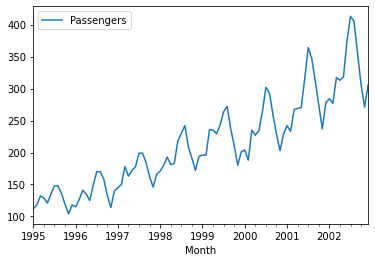

In [128]:
air.plot()
pyplot.show()

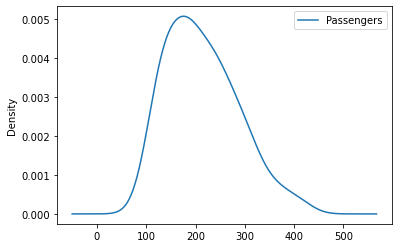

In [129]:
air.plot(kind='kde')
pyplot.show()

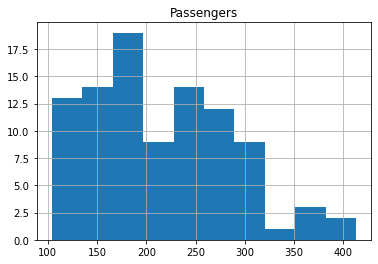

In [42]:
air.hist()
pyplot.show()

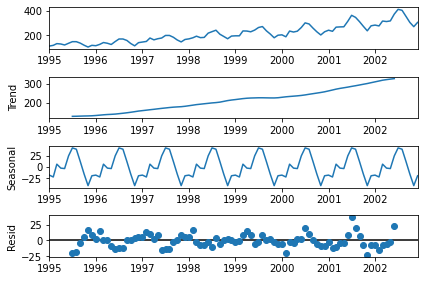

In [130]:
decomposition1 = sm.tsa.seasonal_decompose(air,model='additive')
fig = decomposition1.plot()
plt.show()

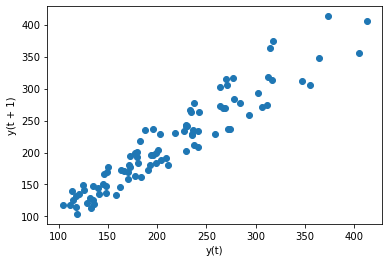

In [131]:
lag_plot(air)
pyplot.show()

In [132]:
air['Passengers']=np.sqrt(air['Passengers'])

In [133]:
air

,Passengers
Month,
1995-01-01,10.583005
1995-02-01,10.862780
1995-03-01,11.489125
1995-04-01,11.357817
1995-05-01,11.000000
...,...
2002-08-01,20.124612
2002-09-01,18.841444
2002-10-01,17.492856


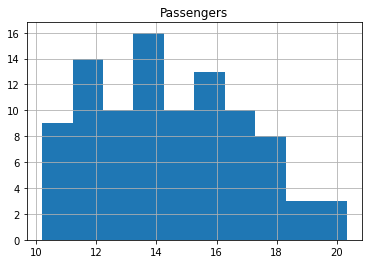

In [134]:
air.hist()
pyplot.show()

# Model Building

In [135]:
train=air.head(72)
test=air.tail(24)

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [138]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [140]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

4.019472831102713

# ARIMA

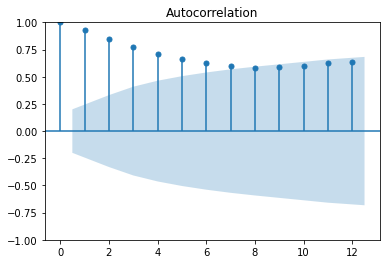

In [136]:
tsa_plots.plot_acf(air.Passengers,lags=12)
plt.show()

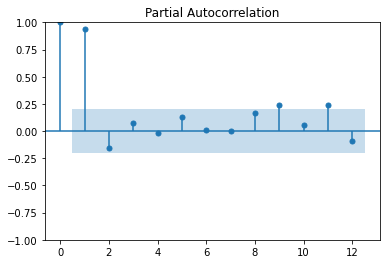

In [137]:
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

In [141]:
p = range(0, 5)
d = range(0, 5)
q = range(0, 3)
pdq_combination=list(itertools.product(p,d,q))

In [142]:
len(pdq_combination)
order=[]
mse=[]

In [143]:
for pdq in pdq_combination:
        model=sm.tsa.arima.ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(air)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        mse.append(error)  
        print('Best ARIMA%s RMSE=%.2f' % (pdq,error))

Best ARIMA(0, 0, 0) RMSE=4.26
Best ARIMA(0, 0, 1) RMSE=4.24
Best ARIMA(0, 0, 2) RMSE=4.22
Best ARIMA(0, 1, 0) RMSE=2.68
Best ARIMA(0, 1, 1) RMSE=2.50
Best ARIMA(0, 1, 2) RMSE=2.55
Best ARIMA(0, 2, 0) RMSE=10.37
Best ARIMA(0, 2, 1) RMSE=1.93
Best ARIMA(0, 2, 2) RMSE=1.74
Best ARIMA(0, 3, 0) RMSE=262.26
Best ARIMA(0, 3, 1) RMSE=11.58
Best ARIMA(0, 3, 2) RMSE=2.93
Best ARIMA(0, 4, 0) RMSE=2076.83
Best ARIMA(0, 4, 1) RMSE=284.13
Best ARIMA(0, 4, 2) RMSE=24.37
Best ARIMA(1, 0, 0) RMSE=3.71
Best ARIMA(1, 0, 1) RMSE=3.82
Best ARIMA(1, 0, 2) RMSE=3.67
Best ARIMA(1, 1, 0) RMSE=2.55
Best ARIMA(1, 1, 1) RMSE=2.61
Best ARIMA(1, 1, 2) RMSE=2.44
Best ARIMA(1, 2, 0) RMSE=4.28
Best ARIMA(1, 2, 1) RMSE=1.78
Best ARIMA(1, 2, 2) RMSE=1.84
Best ARIMA(1, 3, 0) RMSE=173.07
Best ARIMA(1, 3, 1) RMSE=4.64
Best ARIMA(1, 3, 2) RMSE=11.90
Best ARIMA(1, 4, 0) RMSE=1316.02
Best ARIMA(1, 4, 1) RMSE=193.55
Best ARIMA(1, 4, 2) RMSE=9.84
Best ARIMA(2, 0, 0) RMSE=3.85
Best ARIMA(2, 0, 1) RMSE=3.75
Best ARIMA(2, 0, 2) RM

 (3,3,2) is the best value

In [144]:
model=sm.tsa.arima.ARIMA(train,order=(3,3,2)).fit()

In [145]:
len(train),(len(air)-1)

(72, 95)

In [146]:
pred = model.predict(start=len(train),end=(len(air)-1))

In [147]:
pred

2001-01-01    15.265461
2001-02-01    15.247183
2001-03-01    15.536962
2001-04-01    15.662460
2001-05-01    15.830345
2001-06-01    15.977638
2001-07-01    16.149523
2001-08-01    16.286475
2001-09-01    16.449491
2001-10-01    16.588050
2001-11-01    16.741054
2001-12-01    16.877791
2002-01-01    17.023580
2002-02-01    17.157241
2002-03-01    17.296365
2002-04-01    17.426474
2002-05-01    17.559452
2002-06-01    17.685527
2002-07-01    17.812749
2002-08-01    17.934484
2002-09-01    18.056198
2002-10-01    18.173389
2002-11-01    18.289764
2002-12-01    18.402270
Freq: MS, Name: predicted_mean, dtype: float64

In [148]:
err = np.sqrt(mean_squared_error(test,pred))
err

1.3218955552739549

<AxesSubplot:xlabel='Month'>

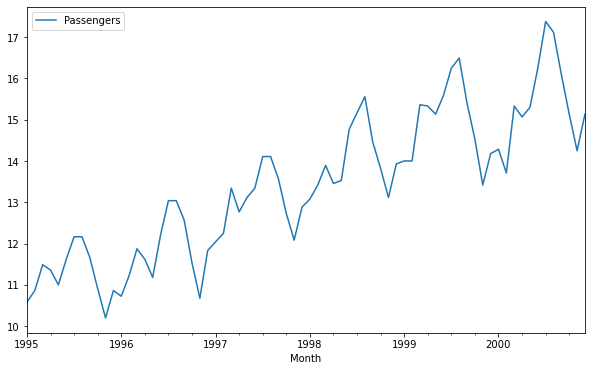

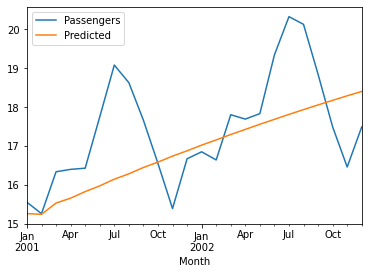

In [149]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='Predicted')

# Final Model

In [158]:
model=sm.tsa.arima.ARIMA(air,order=(3,3,2)).fit()

In [159]:
model.forecast(steps=12)

2003-01-01    321.821660
2003-02-01    318.747841
2003-03-01    333.133428
2003-04-01    341.527485
2003-05-01    351.643112
2003-06-01    359.179591
2003-07-01    370.195687
2003-08-01    378.164022
2003-09-01    388.441097
2003-10-01    396.926302
2003-11-01    406.980360
2003-12-01    415.687974
Freq: MS, Name: predicted_mean, dtype: float64

The RMSE value is 1.3218955552739549 and we have used ARIMA model.